Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, May 25, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [0 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

YOUR ANSWER HERE

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

YOUR ANSWER HERE

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

YOUR ANSWER HERE

## Assignment 1: Curse of Dimensionality [5 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification?

The curse of dimensionality addresses the problems that could arise with high dimensional data. 
Dimensionality refers to the number of attributes/freatures we have in our data. 
Having a high dimensional data also means that we have many different possible feature combinations. Interpreting that geomatrically means that our feature space volume becomes larger the more features we have, also known as "combinatorial explosion".

The first problem caused by high dimensional data is $data$ $sparsity$, meaning that our data we have in our data set cover only a very small part of the possible feature space (feature combinations). 
First of all this raises the quesion on "statistical significance", so how well our data represents the feature space, the extend of the "problem" and therefore how can we see our data as "representatative".
Furthermore it could cause problems in pattern classification. Our classification algorithm tries to learn a general concept by looking at some examples. If we have high dimensional data which covers only a small part of the feature space (sparse data) , our learning algorithm will only concentrate on these few examples, won't generalize well, tend to overfit and thus won't be able to classify unseen data, maybe with another feature combination well. 
So having high dimensional data, we should also pay attention to cover a sufficient amount of the feature space by our training data. 
A feature space with 4 distinct binary features would result in 16 possible unique datapoints. Changing this dimension space to 10 features would result in 1024 possible combinations. Some of these combinations however are not met therefore they form "unused space" in the data distribution leading to unspecified classification in the future. Applying this phenomenon to pattern classification it was observed that the classification performance increased for lower dimension (less features) but quickly decreases as the number of dimensions grows. This makes it apparent, that some features are not significant for the classification progress and should be disregarded.
Additionally having empty/unused space in the distribution might be computational inefficient as well. 

Another problem is $distance$. 
In higher dimensions distances between data points tends to converge to the same distance between all data points. 
This could cause problems in clustering. Clustering algorithms like k-means use distance-based  metrics to figure out similar data and group them together to clusters. If the distance between points is the same, the clustering algorithm won't be able to measure similarity/dissimilarity between data. Hence, won't converge to a (local) optimal solution. 

**b)** Explain how this phenomenom could be used to one's advantage.

One can reduce the number of dimensions to ensure both increase in performance and computational work as well as the model's complexity. Thus the unused or empty space is removed and a new data representation is made.

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.


* $descriptive$ $dimensionality:$ 
without any further assumptions it is the whole 'possible feature space' with all possible combinations we could get when looking at the features. "How the data comes in, how we obsesrve it ". Like all possible hand postures we theoretically could get. 

* $intrinsic$ $dimensionality:$ 
"True dimesnionality"
is more problem oriented, the parameters/ features/dimensions which are necessary to capture the problem. 
Lower dimensionality than descriptice dimensionality. 
we talk about a $"manifold"$, that's the space where the data is concentrated on. Has lower dimensionality than the embedding space (descriptive dimensionality). it consists of distorted pieces on an euclidean space. 
Our goal in dimension reduction is to finde this data manifold on which our data is distributed, so find the lower dimensional coordinate system. 

example:
If you take a video of a dow running and each of the frames is a datapoint the intrinsic dimensionality would consider the changes made from each frame of the dog and would concentrate on the differences between them. However the descriptive dimensionality would consider each possible frame in that video considering incomprehensible photos consisiting of random noise.

**d)** The $n$-dimensional unit cube: A cube with edge length $d=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume and the length of the diagonal for $n = 1, 2, 3, 4, 5, 10, 100, 1000$. Do the same for $d=\frac{1}{2}$. Discuss the result.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

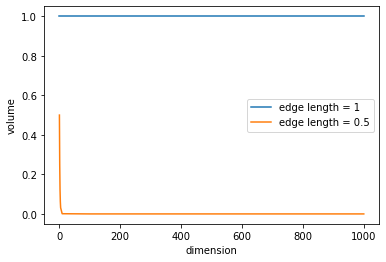

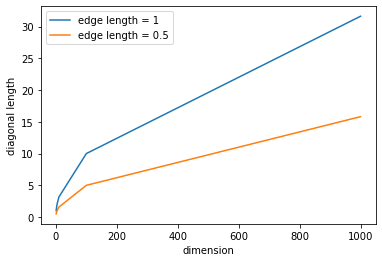

In [3]:
dimensions = [1,2,3,4,5,10,100,1000]
volume_and_diagonal = lambda d: np.array([(d**n,d*np.sqrt(n)) for n in dimensions])

edge_length1 = volume_and_diagonal(1)

edge_length05 = volume_and_diagonal(0.5)


plt.plot(dimensions,edge_length1[:,0],label="edge length = 1")
plt.plot(dimensions,edge_length05[:,0],label="edge length = 0.5")
plt.ylabel('volume')
plt.xlabel('dimension')
plt.legend()
plt.show()

plt.plot(dimensions,edge_length1[:,1],label="edge length = 1")
plt.plot(dimensions,edge_length05[:,1],label="edge length = 0.5")
plt.ylabel('diagonal length')
plt.xlabel('dimension')
plt.legend()
plt.show()


For a edge length of 1 the volume is constant for each number of dimensions. However for a smaller edge length the volume decreases converging to 0 for higher dimensions (and exponentially so). The same rapid increase can be seen for the diagonal length (however the absolute values are different).

**e)** The $n$-dimensional unit ball: A ball with radius $r=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume for $n = 1,2,3,5,10,100,300,400$. Use the following formula to compute the volume $V$ for a given dimension $n$ and radius $R$:

$$ V_{n}(R)\sim {\frac {1}{\sqrt {n\pi }}}\left({\frac {2\pi e}{n}}\right)^{\frac {n}{2}}R^{n}$$

Refer to https://en.wikipedia.org/wiki/Volume_of_an_n-ball for more details.

Consider a $n$-dimensional unit orange consisting of the peel and the pulp: Let the thickness of the peel be $1\%$ of the radius. Compute the volume of the peel and compare to the volume of the whole orange for the same values of $n$. State the implications of your observations.

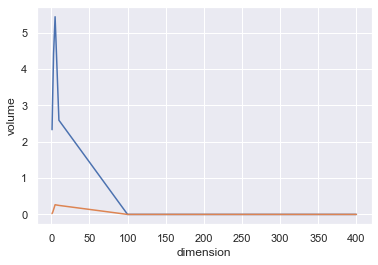

In [16]:
dimensions = [1,2,3,5,10,100,300,400]

calc_volume = lambda n,r: (1/np.sqrt(n*np.pi))*((2*np.pi*np.exp(1))/n)**(n/2)*r**n

r = 1

volumes = [calc_volume(n,r) for n in dimensions]
volumes_peel = [whole-calc_volume(n,r*0.99) for n, whole in zip(dimensions,volumes)]
plt.plot(dimensions,volumes, dimensions, volumes_peel)
plt.ylabel('volume')
plt.xlabel('dimension')
plt.show()

The volume of the whole unit orange increases drastically up until the fifth dimension and then decreases exponentially while converging to 0. The volume of the peel has the same curvurtare but is really slim.

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches).

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [4]:
import numpy as np

# TODO: Load the cars dataset in cars.csv .
cars = np.genfromtxt('cars.csv', delimiter=',')
    
assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)


Excecute the following code which will create a scatter plot matrix (it might take some time to execute). This should give you an idea about trends and correlations in the dataset.

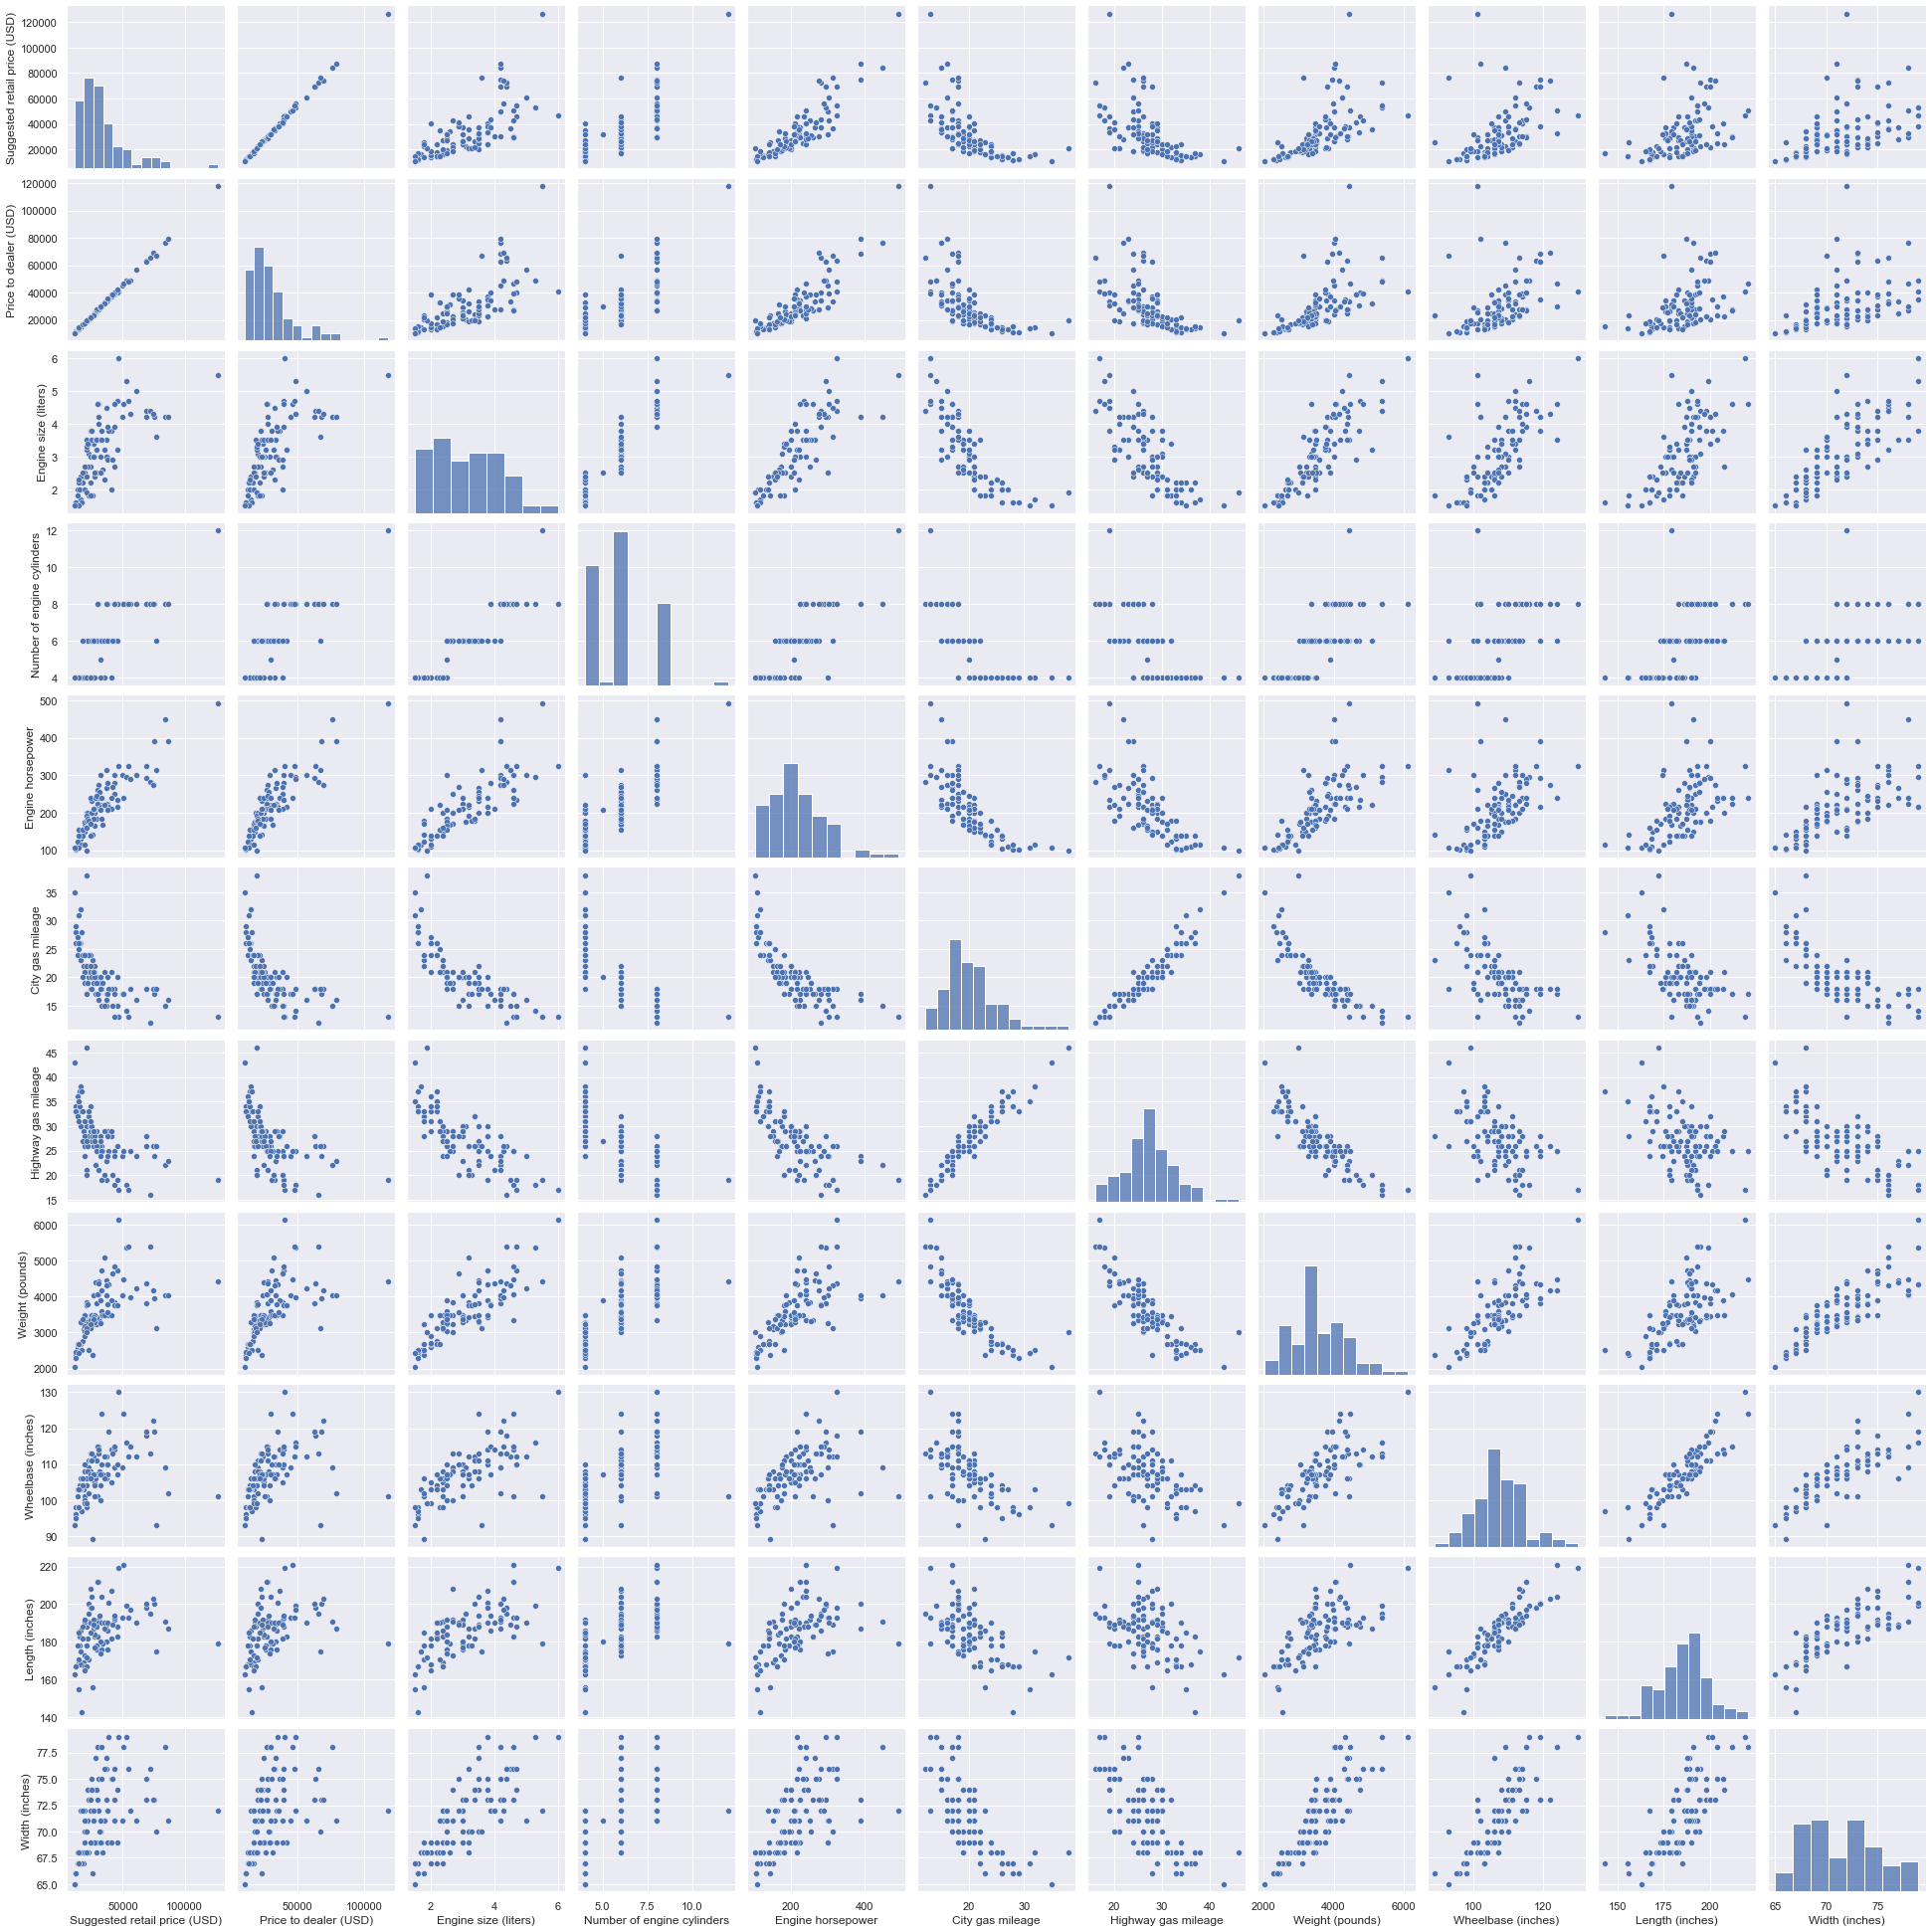

In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
cols = ['Suggested retail price (USD)', 'Price to dealer (USD)',
          'Engine size (liters)', 'Number of engine cylinders',
          'Engine horsepower', 'City gas mileage' ,
          'Highway gas mileage', 'Weight (pounds)',
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']

df = pd.DataFrame(cars, columns=cols)
sns.pairplot(df)

What is the covariance matrix of a dataset? What do the different entries of the matrix mean?

Corresponding to its name it measures the covariance of multiple variables in a dataset. These matrices include all combinations of the given parameters and their covariance to one another. Thus the first element in the index is the covariance of the feature /variable and itself (the variance). Additionally due to the reflexivity of covariance this matrix is symmetric meaning its transposed element is the same as itself. 

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the covariance matrix and afterwards the eigenvalues. When the data is normalized the covariance is calculated as

$$C = \frac{1}{n-1}((\bf{X}-\bar{x})^T(\bf{X}-\bar{x})) $$

with $X$ being an $n \times d$ matrix with $n$ samples and $d$ features, when $\bar{X}$ is the mean vector of features
$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$  

The entry $c_{i,j}$ in $C$ (a $d\times d$ matrix) tells you how much feature $i$ correlates with feature $j$.


**Note**: When the features have different scales, for achieving comparable covariance values, **first and before calculating the covariance matrix**, we need to standardize $X$ respecting its features

$${\bf{X}}_{norm} = \frac{\bf{X}}{\sigma}$$

when $\sigma$ is the standard deviation vector of features.

In [6]:
# TODO: Compute the covariance matrix and store it into covar

# make the mean 0 by substracting each datapoint of the current mean 
# standardize/normalize by deviding from the standard deviation of the current data point
cars_norm = (cars - np.mean(cars,axis = 0)) / np.std(cars, axis = 0)
covar = 1/(cars_norm.shape[0]-1)*(np.dot(cars_norm.T,cars_norm))
assert covar.shape == (11, 11)

# TODO: Compute the eigenvalues and eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
eigenval, eigenvec = np.linalg.eig(covar)

assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)
for ev in eigenvec: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Plot the spectrum of the eigenvalues and make sure that they are sorted by their magnitude (in descending order).

**Note:** Sorting should be done respecting eigenvalues vector, but the order of eigenvectors should also be updated such that the corresponding pairs of eigenvalue-eigenvector be accessible with the same index.

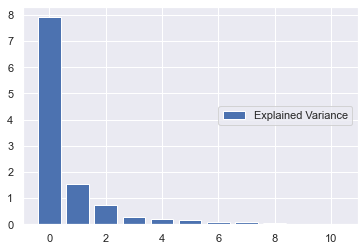

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

sorting = eigenval.argsort()
sorted_eigenval = eigenval[sorting[::-1]]
sorted_eigenvec = eigenvec[sorting[::-1]]

figure = plt.figure('Eigenvalue comparison' )
plt.bar(range(len(sorted_eigenval)), sorted_eigenval,label='Explained Variance')
plt.legend(loc='center right')
plt.show()


How many principal components should you include based on the spectrum plot?

One method to decide about the number of components is the "explained variance." The amount of data variance captured by each principal components is the magnitude of its corresponding eigenvalue. Therefore, in the explained variance method, we calculate the proportion of each the eigenvalue respective to the total sum of the eigenvalues. That gives us the percentage of data variance explained by each corresponding principal component. And the cumulative sum of these percentages shows how much more of the dataset information (variance) is presentable with taking one more component. Knowing that on one hand, and the computational cost and the difficulty of visualization of one more dimension gives a clue for the decision.

Execute the cells below and decide about an efficient number of principal components.

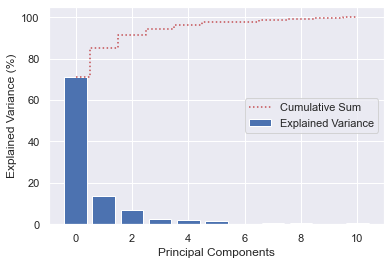

In [9]:
var_exp = [val*100/sum(eigenval) for val in eigenval]
cum_sum = np.cumsum(var_exp)

plt.bar(range(len(eigenval)), var_exp, label='Explained Variance')
plt.step(range(len(eigenval)), cum_sum, 'r:',
         where='mid', label='Cumulative Sum')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.legend(loc='center right');


As you can see, with the first eigenvalue/component we can describe about 70% of the variance in our dataset; taking the first two will increase it to more than 80%. For the sake of a convinient visualization we will go with the first two components, because the increase of the variation is not that much after the second component.

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the two cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the second plot? (**put your answer in the cell below of this code cell**)

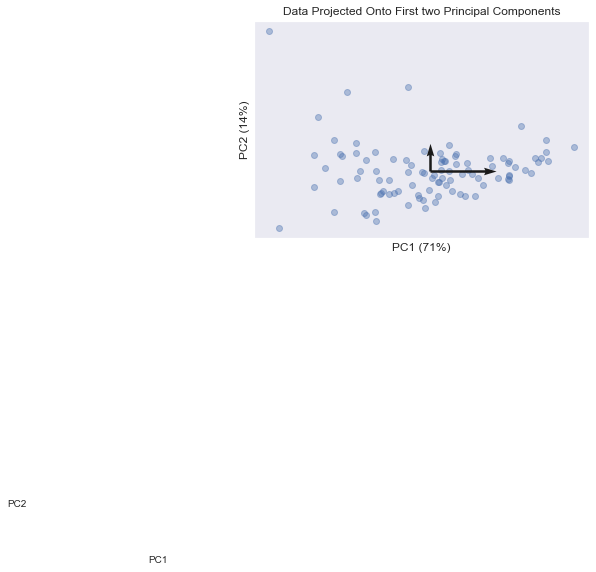

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,:2]


# Plot projected data
plt.title('Data Projected Onto First two Principal Components')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))
plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# Plot the PC Vectors
# Project them and scale them by the standard deviation.
eigenvec_p = eigenvec.T @ eigenvec * np.sqrt(eigenval)
origin = np.mean(proj, axis=0)

plt.quiver(*origin, eigenvec_p[0,0], eigenvec_p[0,1], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, eigenvec_p[1,0], eigenvec_p[1,1], angles='xy', scale_units='xy', scale=1)


plt.text(-12,-17.5, 'PC1')
plt.text(-18,-15, 'PC2');

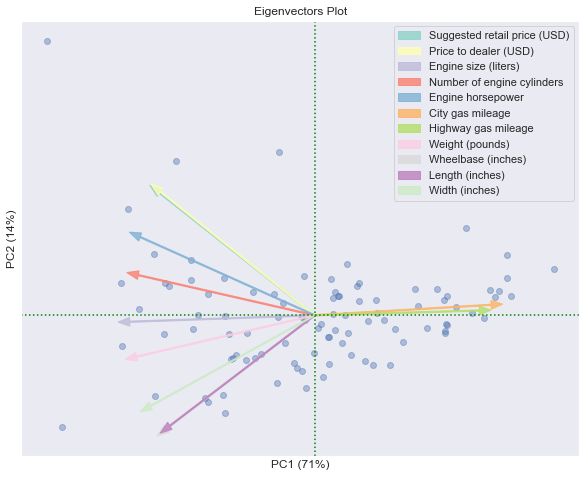

In [152]:
# Set the plot

plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)


plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)

# Plot the eigenvector and add the labels
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
              color=plt.get_cmap('Set3')(idx), 
              width=0.03, head_width=.2, label=cols[idx])   

plt.legend()

plt.show()

In the first plot we can see our data projected onto our new two dimensions and how much of the total variance is captured by the two PCAs, namely 71% and 14%

The aim of PCA is to find new axis in the direction of greatest variance.
The variance of the data kind of includes important information about the data distribution, so by breaking our data down to dimensions of greatest variance we kind of maintain this information. 
Since variance plays an important role and the first two principal components capture 85% of total variance already, we can infer that, despite the reduction by  9 dimensions the natural spread of the data is still quite well represented. 
Hence, I would conclude that PCA works well for our example.

Furthermore, it is also justifiable to add the first two principal components since, as already explained, they capture 85% of the total variance.Thus the data is already well approximated by two principal components. Adding more principal components won't make such a large improvement, since only 15% of variance is "missing".

The second plot shows, the relationship between the PCs and the original features of our data set. for example we can infer that the features "cit gas mileage" and "width" are mainly represented by the first principal component. So we can get a feeling how the data is projected to the lower dimension on a semantic and not only mathmatical level.
So, they show where in space the different features are projected to by our principal components. (Could be good for clustering to have this semantic feeling)

In the first quadrant, we especially see cars with large width and city gas mileage. 
In the second quadrant especially cars with larger numbers of engine cylinders, large suggested retail price, large price to dealer.
in the third quadrant we see cars which cannot be specialized to certain features.
in the forth quadrant we see cars with large length, large wheelbase inces, large highway gas mileage, large engine size, and large size.



## Assignment 3: PCA [3 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the correlation matrix $C$ corresponding to the $m$ largest eigenvalues. The proof consists of two steps. In this exercise you will only proof the first step:

### First step:
Consider a one dimensional subspace: Determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The correlation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

![alt text](variance_proof-2.jpg "Title")
![alt text](variance_proof-3.jpg "Title")

### Second step:
(Outline for the interested reader. You do not have to solve this second part.)

In the second step the statement for the general case of an $m$-dimensional projection space is proofed by induction:

Assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to the first step, but with additional Lagrangian multipliers to enforce the orthogonality constraint. One can then show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally it can be shown that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

In [ ]:
# YOUR CODE HERE